# Best Neighbourhood in Your Budget

<hr>

> <h2 align='justify'> Buying a perfect home is a dream for each an every individual. We have been always trying to buy the home which would be perfect for us. For years property consultants and brokers are the people who have helped us in our endeavour. <br/> </h2>
### Now with the addition of new technologies stakeholders have changed their methods to improve their services and in this IT age with the help of technology and data they are trying their best to achieve better results. 


<p align='justify'>So I have decided in my project to make something useful for all the buyers as well the stakeholders in this business.
I am using Toronto City data but this project could be expanded to other metropolitan cities as well.</p>

>[Click here to open notebook in binder](https://mybinder.org/v2/gh/bilalhaider10/Coursera_Capstone.git/HEAD?filepath=2020-01-29-Toronto-neighbourhood-classification.ipynb) <br/>
Make sure to make notebook trusted to display map

<p align='center'>I am using Foursquare API as well as scraped webpages to get the average property cost in each and every area of Toronto City. As we know cost is the major driver where a person may live.<br/>
    <b>Foursquare API</b> would be used to get the locality of an area. The locality and venues would be helpful for individual looking to get the best place he needs. <b>For example</b> A bachelor would like to live where there is nearby pubs, entertainment centres and work places. But a person having a family may wants to live where there is nearby schools, shops and parks.</p>

## Data Section<br/> 
<hr>

We are using FourSquare API, Geocoders, and web Scraping techniques to solve our problem.

**FourSquare API** would be used to get nearby venues around a location. This venue data would be used to classify our neighbourhood based on the locality.


**Geocoders** would be used to get latitude and longitude of neighbourhoods. This latitude and longitude is required for maps and FourSquare API.

I searched but couldn't find any structured dataset to get average housing cost in a neighborhood. So I scraped a webpage which shows the average housing cost of a neighborhood. [Click here to view webpage](https://www.moneysense.ca/spend/real-estate/where-to-buy-real-estate-in-2020-city-of-toronto/)

In [46]:
import requests
import pandas as pd
from geopy.geocoders import Nominatim
from IPython.display import HTML, IFrame


url = 'https://www.moneysense.ca/spend/real-estate/where-to-buy-real-estate-in-2020-city-of-toronto/'

header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

r = requests.get(url, headers=header)


In [2]:

dfs = pd.read_html(r.text)
df=dfs[0]

In [3]:
df

,Rank,Area,Province,Neighbourhood,Area average price 2019,Value,Momentum,Average price vs. area,Average price vs. metro district,Average price vs. greater city area,1-Year price change,5-Year price change,Final star rating
0,1,Toronto W06,ON,Alderwood,"$1,012,359",68.23,98.32,150.4%,128.8%,120.0%,65.4%,97.7%,★★★★
1,2,Toronto C08,ON,Moss Park,"$1,509,796",50.49,99.43,173.5%,221.6%,206.5%,80.9%,98.2%,★★★★
2,3,Toronto E01,ON,Blake-Jones,"$1,241,262",60.86,92.39,117.9%,123.8%,115.4%,45.6%,94.6%,★★★
3,4,Toronto C10,ON,Mount Pleasant East,"$1,594,740",51.87,94.85,137.5%,185.5%,172.9%,37.7%,95.1%,★★★★
4,5,Toronto C02,ON,Yonge-St. Clair,"$2,095,964",47.70,86.82,159.7%,283.3%,263.9%,19.5%,87.7%,★★★★★
...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,137,Toronto C01,ON,Waterfront Communities C1,"$1,648,312",(22.35),0.00,0.0%,0.0%,0.0%,0,0.0%,★★★
137,138,Toronto C08,ON,Waterfront Communities C8,"$1,509,796",(22.35),0.00,0.0%,0.0%,0.0%,0,0.0%,★★★
138,139,Toronto W04,ON,Weston,"$850,365",(22.35),0.26,0.0%,0.0%,0.0%,-100.0%,0.3%,★★
139,140,Toronto C08,ON,North St. James Town,"$1,509,796",(22.35),0.00,0.0%,0.0%,0.0%,0,0.0%,★★


### Data Cleaning
We are only interested in Area, Neighbourhood and Area average price. Hence we would drop other columns

In [4]:
df=df.filter(items=['Area','Neighbourhood','Area average price 2019'])
df

,Area,Neighbourhood,Area average price 2019
0,Toronto W06,Alderwood,"$1,012,359"
1,Toronto C08,Moss Park,"$1,509,796"
2,Toronto E01,Blake-Jones,"$1,241,262"
3,Toronto C10,Mount Pleasant East,"$1,594,740"
4,Toronto C02,Yonge-St. Clair,"$2,095,964"
...,...,...,...
136,Toronto C01,Waterfront Communities C1,"$1,648,312"
137,Toronto C08,Waterfront Communities C8,"$1,509,796"
138,Toronto W04,Weston,"$850,365"
139,Toronto C08,North St. James Town,"$1,509,796"


The average price is in object type hence it needs to be converted to float

In [5]:
df[df.columns[2]] = df[df.columns[2]].replace('[\$,]', '', regex=True).astype(float)

In [6]:
df

,Area,Neighbourhood,Area average price 2019
0,Toronto W06,Alderwood,1012359.0
1,Toronto C08,Moss Park,1509796.0
2,Toronto E01,Blake-Jones,1241262.0
3,Toronto C10,Mount Pleasant East,1594740.0
4,Toronto C02,Yonge-St. Clair,2095964.0
...,...,...,...
136,Toronto C01,Waterfront Communities C1,1648312.0
137,Toronto C08,Waterfront Communities C8,1509796.0
138,Toronto W04,Weston,850365.0
139,Toronto C08,North St. James Town,1509796.0


Using geocode to get latitude and longitude of a neighbourhood

In [7]:
# place=df1['Neighbourhood'][0]
# place=place+ ' Toronto'
# place
index=0
latitude=[]
longitude=[]
geolocator = Nominatim(user_agent="toronto")
for i in df['Neighbourhood'].iteritems():
            address = i[1] + ' Toronto'
            location = geolocator.geocode(address)
            if(location is None):
                df.drop([index],inplace=True)
                index=index+1
                continue
            lat = location.latitude
            long = location.longitude
            index=index+1
            latitude.append(lat)
            longitude.append(long)

In [8]:

df['Latitude']=latitude
df['Longitude']=longitude


### Now we will  visualize our Data

In [9]:
df_price=df[['Neighbourhood','Area average price 2019']]
df_price.set_index('Neighbourhood',inplace=True)

In [10]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


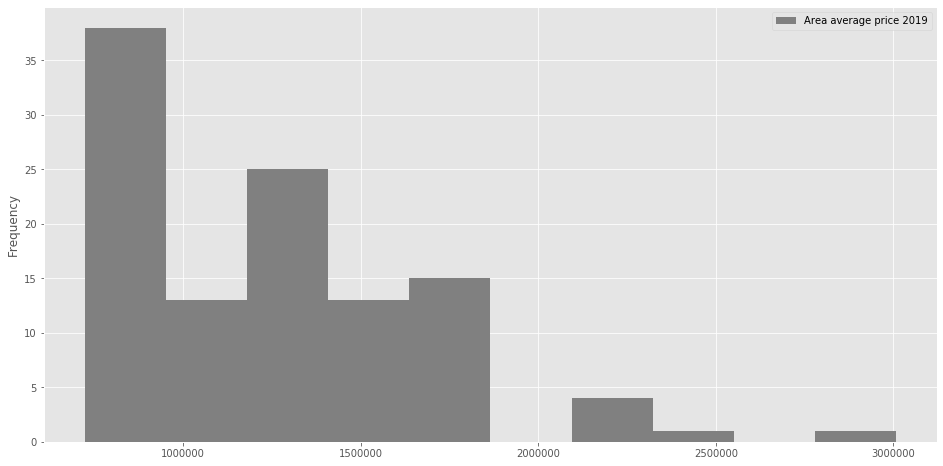

In [11]:
df_price.plot(kind='hist',figsize=(16,8),color='grey')

Text(0, 0.5, 'Price in $')

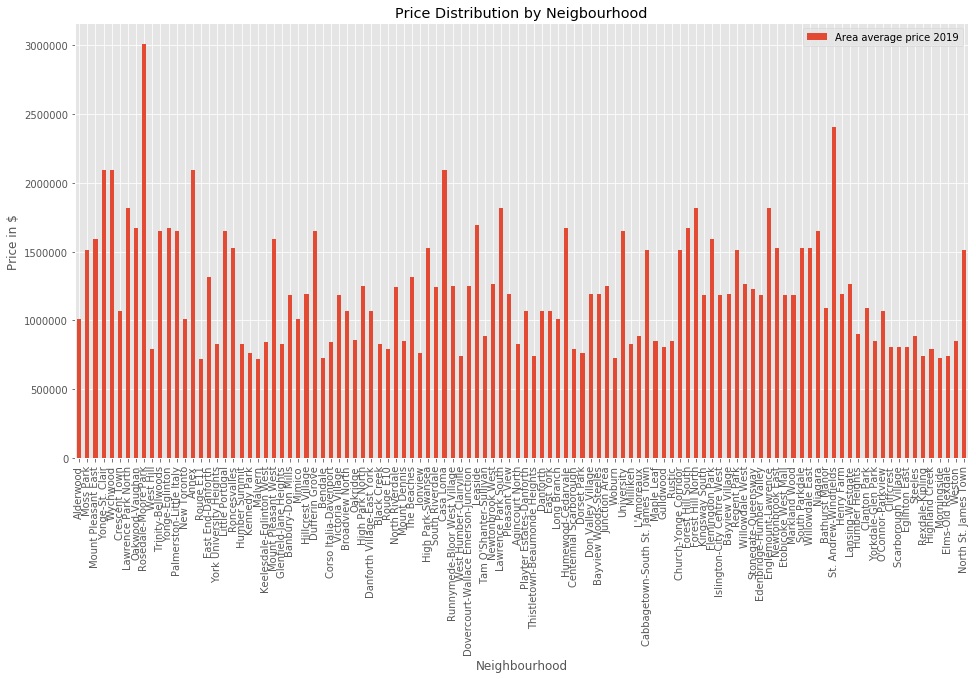

In [12]:
df_price.plot(kind='bar',figsize=(16,8))
plt.title("Price Distribution by Neigbourhood")
plt.ylabel('Price in $')

In [13]:
df_price.describe()

,Area average price 2019
count,1.100000e+02
mean,1.220273e+06
std,4.243845e+05
min,7.222090e+05
25%,8.453160e+05
50%,1.184223e+06
75%,1.526647e+06
max,3.008096e+06


Text(0, 0.5, 'Price in $')

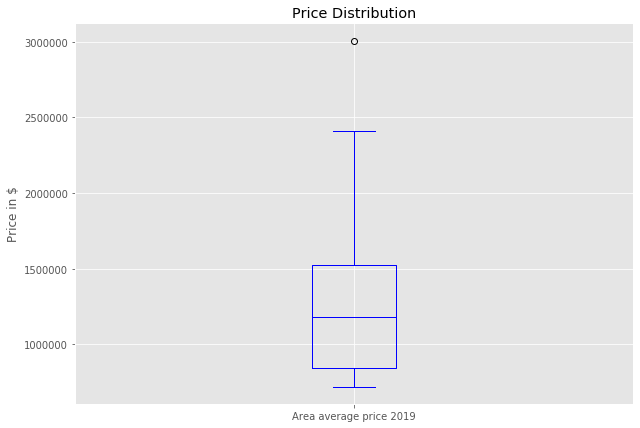

In [14]:
df_price.plot(kind='box',figsize=(10,7),color='blue')
plt.title("Price Distribution")
plt.ylabel('Price in $')

Now we are using folium to demonstrate the data points on map with labels demonstrating average price and neighborhood

In [50]:
import folium
location = geolocator.geocode('Toronto')
latitude = location.latitude
longitude = location.longitude
# create map of New York using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighbourhood,price in zip(df['Latitude'], df['Longitude'], df['Neighborhood'],df['Area average price 2019']):
    label = '{}, {}'.format(neighbourhood,price )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
map_toronto.save('map_toronto.html')


In [60]:
#hide
IFrame(src='/firstBlog/assets/attach/map_toronto.html', width=500, height=500)


### Now we will use FourSquare API to get nearby venues

In [16]:
df_new=df_price.reset_index()
df_new

,Neighbourhood,Area average price 2019
0,Alderwood,1012359.0
1,Moss Park,1509796.0
2,Mount Pleasant East,1594740.0
3,Yonge-St. Clair,2095964.0
4,Wychwood,2095964.0
...,...,...
105,Highland Creek,790226.0
106,Morningside,727426.0
107,Elms-Old Rexdale,739999.0
108,Weston,850365.0


In [17]:
geo = 'toronto_crs84.geojson' # geojson file

# create a plain world map
map1 = folium.Map(location=[43.718432, -79.333204], zoom_start=11)


In [51]:

map1.choropleth(
    geo_data=geo,
    data=df_new,
    columns=['Neighbourhood', 'Area average price 2019'],
    key_on='feature.properties.AREA_NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Average Price in Toronto',
    
)
map1.save('map1.html')


In [59]:
#hide
IFrame(src='/firstBlog/assets/attach/map1.html', width=500, height=500)


In [56]:
CLIENT_ID = 'XXX' # your Foursquare ID
CLIENT_SECRET = 'XXX' # your Foursquare Secret
ACCESS_TOKEN = 'XXX' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100 # A default Foursquare API limit value


Function to extract useful response

In [20]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Getting nearby venues from each neighbourhood

In [21]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [22]:
df.rename(columns={"Neighbourhood":"Neighborhood"},inplace=True)

In [24]:
# type your answer here
toronto_venues = getNearbyVenues(names=df['Neighborhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Alderwood
Moss Park
Mount Pleasant East
Yonge-St. Clair
Wychwood
Crescent Town
Lawrence Park North
Oakwood-Vaughan
Rosedale-Moore Park
West Hill
Trinity-Bellwoods
Yonge-Eglinton
Palmerston-Little Italy
New Toronto
Annex
Rouge E11
East End-Danforth
York University Heights
Little Portugal
Roncesvalles
Humber Summit
Kennedy Park
Malvern
Keelesdale-Eglinton West
Mount Pleasant West
Glenfield-Jane Heights
Banbury-Don Mills
Mimico
Hillcrest Village
Dufferin Grove
Bendale
Corso Italia-Davenport
Victoria Village
Broadview North
Oakridge
High Park North
Danforth Village-East York
Black Creek
Rouge E10
North Riverdale
Mount Dennis
The Beaches
Ionview
High Park-Swansea
South Riverdale
Casa Loma
Runnymede-Bloor West Village
West Humber-Clairville
Dovercourt-Wallace Emerson-Junction
Leaside
Tam O'Shanter-Sullivan
Newtonbrook West
Lawrence Park South
Pleasant View
Agincourt North
Playter Estates-Danforth
Thistletown-Beaumonde Heights
Danforth
East York
Long Branch
Humewood-Cedarvale
Centennial Scarb

In [25]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alderwood,43.601717,-79.545232,Il Paesano Pizzeria & Restaurant,43.601280,-79.545028,Pizza Place
1,Alderwood,43.601717,-79.545232,Timothy's Pub,43.600165,-79.544699,Pub
2,Alderwood,43.601717,-79.545232,Toronto Gymnastics International,43.599832,-79.542924,Gym
3,Alderwood,43.601717,-79.545232,Tim Hortons,43.602396,-79.545048,Coffee Shop
4,Alderwood,43.601717,-79.545232,Pizza Pizza,43.605340,-79.547252,Pizza Place


#### Now getting the returned venues from each neighborhood.

In [26]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt North,24,24,24,24,24,24
Alderwood,5,5,5,5,5,5
Annex,39,39,39,39,39,39
Banbury-Don Mills,5,5,5,5,5,5
Bathurst Manor,70,70,70,70,70,70
...,...,...,...,...,...,...
Wychwood,45,45,45,45,45,45
Yonge-Eglinton,72,72,72,72,72,72
Yonge-St. Clair,58,58,58,58,58,58


In [27]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 270 uniques categories.


#### Now we would use dummy variables to use our Model

In [28]:

# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
toronto_onehot.shape

(2398, 270)

In [30]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
# toronto_grouped =pd.merge(toronto_grouped,df2,on='Neighborhood')
toronto_grouped

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Argentinian Restaurant,Art Gallery,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt North,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.041667,0.0,0.000000,0.0,0.000000,0.0
1,Alderwood,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,Annex,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.025641,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.025641,0.0
3,Banbury-Don Mills,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,Bathurst Manor,0.000000,0.0,0.0,0.0,0.014286,0.0,0.0,0.000000,0.000000,...,0.0,0.014286,0.000000,0.028571,0.014286,0.0,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Wychwood,0.022222,0.0,0.0,0.0,0.022222,0.0,0.0,0.000000,0.022222,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
106,Yonge-Eglinton,0.013889,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.013889,0.013889,0.000000,0.013889,0.0,0.013889,0.0,0.000000,0.0
107,Yonge-St. Clair,0.017241,0.0,0.0,0.0,0.017241,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.017241,0.0,0.000000,0.0,0.000000,0.0
108,York University Heights,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.052632,0.0,0.000000,0.0,0.000000,0.0



#### Getting Most common Venues

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [32]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt North,Bank,Chinese Restaurant,Coffee Shop,Fast Food Restaurant,Sandwich Place,Liquor Store,Spa,Movie Theater,Fried Chicken Joint,Frozen Yogurt Shop
1,Alderwood,Pizza Place,Coffee Shop,Gym,Pub,Field,Fast Food Restaurant,Farmers Market,Filipino Restaurant,Falafel Restaurant,Dumpling Restaurant
2,Annex,Pizza Place,Thai Restaurant,Gym,Bistro,Donut Shop,Diner,Sushi Restaurant,Korean Restaurant,Fried Chicken Joint,Bookstore
3,Banbury-Don Mills,Park,Intersection,Gas Station,Japanese Restaurant,Falafel Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Factory
4,Bathurst Manor,Korean Restaurant,Grocery Store,Coffee Shop,Eastern European Restaurant,Video Store,Ice Cream Shop,Café,Bar,Bakery,Mexican Restaurant


### Final Dataset Used for clustering

In [33]:
toronto_grouped=pd.merge(toronto_grouped,df,on='Neighborhood')
toronto_grouped_clustering = toronto_grouped.drop(['Neighborhood','Area'],axis= 1)



In [34]:
toronto_grouped_clustering

,Yoga Studio,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Animal Shelter,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,...,Video Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Area average price 2019,Latitude,Longitude
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.041667,0.0,0.000000,0.0,0.000000,0.0,831826.0,43.808038,-79.266439
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1012359.0,43.601717,-79.545232
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.025641,0.0,2095964.0,43.670338,-79.407117
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,1187598.0,43.752683,-79.365270
4,0.000000,0.0,0.0,0.0,0.014286,0.0,0.0,0.000000,0.000000,0.0,...,0.028571,0.014286,0.0,0.000000,0.0,0.000000,0.0,1089948.0,43.665519,-79.411937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.022222,0.0,0.0,0.0,0.022222,0.0,0.0,0.000000,0.022222,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,2095964.0,43.682171,-79.423113
106,0.013889,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.013889,0.0,0.013889,0.0,0.000000,0.0,1672260.0,43.706748,-79.398327
107,0.017241,0.0,0.0,0.0,0.017241,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.017241,0.0,0.000000,0.0,0.000000,0.0,2095964.0,43.688078,-79.394396
108,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.000000,0.052632,0.0,0.000000,0.0,0.000000,0.0,828052.0,43.758781,-79.519434


In [35]:

from sklearn.cluster import KMeans

kclusters = 4
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:]

array([3, 1, 0, 1, 1, 1, 1, 3, 3, 1, 2, 0, 3, 2, 1, 3, 3, 1, 1, 1, 1, 3,
       1, 2, 1, 1, 1, 3, 3, 2, 1, 2, 2, 2, 3, 3, 1, 1, 2, 3, 1, 3, 3, 2,
       3, 1, 1, 3, 3, 1, 3, 1, 2, 2, 2, 2, 1, 3, 3, 1, 3, 1, 3, 2, 3, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 2, 2, 1, 1, 2, 3, 2, 0, 3, 3, 1, 3, 3,
       2, 1, 0, 3, 1, 3, 1, 3, 2, 2, 1, 3, 3, 3, 2, 1, 3, 0, 2, 0, 3, 3])

In [36]:
# add clustering labels

neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = df

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

toronto_merged.head() # check the last columns!

,Area,Neighborhood,Area average price 2019,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Toronto W06,Alderwood,1012359.0,43.601717,-79.545232,1,Pizza Place,Coffee Shop,Gym,Pub,Field,Fast Food Restaurant,Farmers Market,Filipino Restaurant,Falafel Restaurant,Dumpling Restaurant
1,Toronto C08,Moss Park,1509796.0,43.654644,-79.369728,2,Coffee Shop,Furniture / Home Store,Café,Italian Restaurant,Sandwich Place,Grocery Store,Diner,Food & Drink Shop,Sushi Restaurant,Karaoke Bar
3,Toronto C10,Mount Pleasant East,1594740.0,43.708417,-79.390135,2,Dessert Shop,Coffee Shop,Pizza Place,Sandwich Place,Sushi Restaurant,Gym,Italian Restaurant,Café,Brewery,Supermarket
4,Toronto C02,Yonge-St. Clair,2095964.0,43.688078,-79.394396,0,Coffee Shop,Italian Restaurant,Grocery Store,Café,Thai Restaurant,Sushi Restaurant,Pizza Place,Bank,Restaurant,Sandwich Place
5,Toronto C02,Wychwood,2095964.0,43.682171,-79.423113,0,Coffee Shop,Ice Cream Shop,Restaurant,Sushi Restaurant,Pizza Place,Italian Restaurant,Bakery,Café,Convenience Store,Caribbean Restaurant


In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
map_clusters.save('map_cluster.html')


In [58]:
#hide
IFrame(src='/firstBlog/assets/attach/map_cluster.html',width=500, height=500)

In [38]:
toronto_merged.loc[toronto_merged['Cluster Labels']==0]

,Area,Neighborhood,Area average price 2019,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Toronto C02,Yonge-St. Clair,2095964.0,43.688078,-79.394396,0,Coffee Shop,Italian Restaurant,Grocery Store,Café,Thai Restaurant,Sushi Restaurant,Pizza Place,Bank,Restaurant,Sandwich Place
5,Toronto C02,Wychwood,2095964.0,43.682171,-79.423113,0,Coffee Shop,Ice Cream Shop,Restaurant,Sushi Restaurant,Pizza Place,Italian Restaurant,Bakery,Café,Convenience Store,Caribbean Restaurant
9,Toronto C09,Rosedale-Moore Park,3008096.0,43.690388,-79.383297,0,Playground,Lawyer,Restaurant,Tennis Court,Gym,Women's Store,Event Space,Egyptian Restaurant,Electronics Store,Elementary School
16,Toronto C02,Annex,2095964.0,43.670338,-79.407117,0,Pizza Place,Thai Restaurant,Gym,Bistro,Donut Shop,Diner,Sushi Restaurant,Korean Restaurant,Fried Chicken Joint,Bookstore
63,Toronto C02,Casa Loma,2095964.0,43.678101,-79.409416,0,Sandwich Place,History Museum,Coffee Shop,Café,Pharmacy,Theater,Indian Restaurant,Liquor Store,Middle Eastern Restaurant,Modern European Restaurant
116,Toronto C12,St. Andrew-Windfields,2408769.0,43.647792,-79.384871,0,Coffee Shop,Café,Hotel,Asian Restaurant,Seafood Restaurant,American Restaurant,Gym,Taco Place,Sushi Restaurant,Restaurant


In [39]:
toronto_merged.loc[toronto_merged['Cluster Labels']==1]

,Area,Neighborhood,Area average price 2019,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Toronto W06,Alderwood,1012359.0,43.601717,-79.545232,1,Pizza Place,Coffee Shop,Gym,Pub,Field,Fast Food Restaurant,Farmers Market,Filipino Restaurant,Falafel Restaurant,Dumpling Restaurant
6,Toronto E03,Crescent Town,1069340.0,43.695403,-79.293099,1,Convenience Store,Metro Station,Golf Course,Park,Women's Store,Factory,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space
14,Toronto W06,New Toronto,1012359.0,43.600763,-79.505264,1,Mexican Restaurant,Pharmacy,Dessert Shop,Flower Shop,Café,Scenic Lookout,Fried Chicken Joint,Elementary School,Restaurant,Pub
18,Toronto E02,East End-Danforth,1316352.0,43.668440,-79.330670,1,Pizza Place,Park,Convenience Store,Indie Theater,Burger Joint,Skating Rink,Café,Egyptian Restaurant,Coffee Shop,Mexican Restaurant
34,Toronto C13,Banbury-Don Mills,1187598.0,43.752683,-79.365270,1,Park,Intersection,Gas Station,Japanese Restaurant,Falafel Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space,Factory
35,Toronto W06,Mimico,1012359.0,43.616677,-79.496805,1,Bar,Skating Rink,American Restaurant,Café,Bakery,Women's Store,Falafel Restaurant,Ethiopian Restaurant,Event Space,Factory
37,Toronto C15,Hillcrest Village,1193437.5,43.681695,-79.425712,1,Coffee Shop,Italian Restaurant,Café,Restaurant,Mexican Restaurant,Indian Restaurant,Burger Joint,Sushi Restaurant,Bakery,Juice Bar
42,Toronto C13,Victoria Village,1187598.0,43.732658,-79.311189,1,Spa,Park,Bus Line,Middle Eastern Restaurant,Thai Restaurant,Filipino Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Egyptian Restaurant
43,Toronto E03,Broadview North,1069340.0,43.683924,-79.356964,1,Theater,Bus Line,Other Great Outdoors,Grocery Store,Discount Store,Intersection,Coffee Shop,Ice Cream Shop,Park,Fast Food Restaurant
45,Toronto W02,High Park North,1252811.0,43.657383,-79.470961,1,Park,Baseball Field,Gym / Fitness Center,Women's Store,Falafel Restaurant,Elementary School,Ethiopian Restaurant,Event Space,Factory,Farmers Market


In [40]:
toronto_merged.loc[toronto_merged['Cluster Labels']==2]

,Area,Neighborhood,Area average price 2019,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Toronto C08,Moss Park,1509796.0,43.654644,-79.369728,2,Coffee Shop,Furniture / Home Store,Café,Italian Restaurant,Sandwich Place,Grocery Store,Diner,Food & Drink Shop,Sushi Restaurant,Karaoke Bar
3,Toronto C10,Mount Pleasant East,1594740.0,43.708417,-79.390135,2,Dessert Shop,Coffee Shop,Pizza Place,Sandwich Place,Sushi Restaurant,Gym,Italian Restaurant,Café,Brewery,Supermarket
7,Toronto C04,Lawrence Park North,1819957.0,43.729199,-79.403252,2,Sushi Restaurant,Italian Restaurant,Bakery,Coffee Shop,Pub,Bank,Pharmacy,Asian Restaurant,Fast Food Restaurant,Cosmetics Shop
8,Toronto C03,Oakwood-Vaughan,1672260.0,43.682857,-79.419540,2,Ice Cream Shop,Coffee Shop,Pizza Place,Yoga Studio,Portuguese Restaurant,Sushi Restaurant,Frozen Yogurt Shop,Latin American Restaurant,Caribbean Restaurant,Food & Drink Shop
11,Toronto C01,Trinity-Bellwoods,1648312.0,43.645482,-79.413249,2,Men's Store,Coffee Shop,Yoga Studio,Park,Diner,Café,Middle Eastern Restaurant,Boutique,Bar,Deli / Bodega
12,Toronto C03,Yonge-Eglinton,1672260.0,43.706748,-79.398327,2,Coffee Shop,Italian Restaurant,Pub,Gym,Bookstore,Bakery,Movie Theater,Middle Eastern Restaurant,Grocery Store,Restaurant
13,Toronto C01,Palmerston-Little Italy,1648312.0,43.660065,-79.411806,2,Café,Park,Indie Theater,Salon / Barbershop,French Restaurant,Furniture / Home Store,Cheese Shop,Donut Shop,Taco Place,Juice Bar
21,Toronto C01,Little Portugal,1648312.0,43.647413,-79.431116,2,Bar,Café,Coffee Shop,Bakery,Cocktail Bar,Restaurant,Korean Restaurant,Sandwich Place,Breakfast Spot,French Restaurant
23,Toronto W01,Roncesvalles,1526647.0,43.651443,-79.451038,2,Café,Bookstore,Restaurant,Breakfast Spot,Gift Shop,Gourmet Shop,Bakery,Brewery,Bar,Sandwich Place
31,Toronto C10,Mount Pleasant West,1594740.0,43.708417,-79.390135,2,Dessert Shop,Coffee Shop,Pizza Place,Sandwich Place,Sushi Restaurant,Gym,Italian Restaurant,Café,Brewery,Supermarket


In [41]:
toronto_merged.loc[toronto_merged['Cluster Labels']==3]

,Area,Neighborhood,Area average price 2019,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Toronto E10,West Hill,790226.0,43.768914,-79.187291,3,Pizza Place,Bank,Pharmacy,Fast Food Restaurant,Breakfast Spot,Restaurant,Electronics Store,Supermarket,Beer Store,Fried Chicken Joint
17,Toronto E11,Rouge E11,722209.0,43.804930,-79.165837,3,Caribbean Restaurant,Park,Fast Food Restaurant,Fish Market,Fish & Chips Shop,Filipino Restaurant,Field,Flea Market,Eastern European Restaurant,Farmers Market
20,Toronto W05,York University Heights,828052.0,43.758781,-79.519434,3,Grocery Store,Fast Food Restaurant,Pizza Place,Discount Store,Coffee Shop,Gas Station,Beer Store,Sandwich Place,Liquor Store,Fried Chicken Joint
24,Toronto W05,Humber Summit,828052.0,43.760078,-79.571760,3,Construction & Landscaping,Restaurant,Park,Bakery,Women's Store,Factory,Egyptian Restaurant,Electronics Store,Elementary School,Ethiopian Restaurant
26,Toronto E04,Kennedy Park,761729.0,43.724878,-79.253969,3,Fast Food Restaurant,Chinese Restaurant,Grocery Store,Asian Restaurant,Women's Store,Factory,Electronics Store,Elementary School,Ethiopian Restaurant,Event Space
27,Toronto E11,Malvern,722209.0,43.809196,-79.221701,3,Fast Food Restaurant,Pharmacy,Pizza Place,Restaurant,Grocery Store,Skating Rink,Supermarket,Sandwich Place,Bubble Tea Shop,Park
28,Toronto W03,Keelesdale-Eglinton West,843633.0,43.690158,-79.474998,3,Turkish Restaurant,Sandwich Place,Skating Rink,Discount Store,Falafel Restaurant,Elementary School,Ethiopian Restaurant,Event Space,Factory,Women's Store
32,Toronto W05,Glenfield-Jane Heights,828052.0,43.724373,-79.458398,3,Clothing Store,Dessert Shop,Restaurant,American Restaurant,Men's Store,Women's Store,Shopping Mall,Seafood Restaurant,Cheese Shop,Chocolate Shop
40,Toronto E09,Bendale,727426.0,43.753520,-79.255336,3,Dog Run,Optical Shop,Fast Food Restaurant,Grocery Store,Tennis Court,Discount Store,Women's Store,Event Space,Electronics Store,Elementary School
41,Toronto W03,Corso Italia-Davenport,843633.0,43.677954,-79.443083,3,Italian Restaurant,Breakfast Spot,Coffee Shop,Sushi Restaurant,Pet Store,Café,Sandwich Place,Mexican Restaurant,Mediterranean Restaurant,Martial Arts School


In [42]:
toronto_info=toronto_merged.groupby(by='Cluster Labels').mean()

In [43]:
toronto_merged.groupby(by='Cluster Labels').size()

Cluster Labels
0     6
1    38
2    28
3    38
dtype: int64

In [44]:
round(toronto_info['Area average price 2019'])

Cluster Labels
0    2300120.0
1    1166129.0
2    1625880.0
3     805047.0
Name: Area average price 2019, dtype: float64

<h2 align='center'>Conclusion</h2> <hr>

We have grouped toronto's neighbourhood in 4 clusters.<br/> 
**Here are some results that we found after clustering:**

On average cost.
<ol>
    <li>The first cluster's average cost of 2300120.0 </li>
    <li>The second cluster's average cost of 808301.0 </li>  
    <li>The third cluster's average cost of 1631649.0 </li>   
    <li>The fourth cluster's average cost of 1171028.0 </li>
</ol>
 <p align='justify'> The conclusion would be the first cluster is the most expensive neighbourhood and second is least expensive third and fourth are moderately expensive </p>

The neighborhood is:
<ol>
<li>First cluster's nearby venues consist of restaurant and grocery shops</li>
<li>Second cluster's nearby venues consist of all types of restaurant and basic amneties. It looks a great neighbourhood to live as the cost is also low</li>
<li>Third Cluster's nearby venues consist of pubs, restaurant, parks, entertainment and leisure places</li>
<li>Fourth Cluster's nearby venues consist of Parks, restaurant, Coffee shops, Banks</li>

</ol>

The **conclusion** I got from the above result is the first cluster is the most expensive one. It consist of restaurant and different types of shops and musuem. But this cluster only has six neighborhoods and by analyzing the map we find that it is in the epicentre of the city<br/>
The **second** cluster is the least expensive one and it has restaurant and basic amneties around which could be a great place for people having families By analyzing the map we could know that these neighborhoods surround the epicentre of the city.<br/>
The **third** cluster is all around the city and it is a second most expensive neighborhood. It consist of all the leisure centre and entertainment places hence would be suitable for bachelors. It may also be suitable for opening new stores. <br/>
The **fourth** cluster is away from the epicentre of the city and it also a second least expensive place. It has Parks, restaurant and coffee shops all around it.

In [10]:
from IPython.display import HTML, IFrame
IFrame(src='map1.html', width=500, height=500)
